In [1]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

df = pd.read_csv('https://raw.githubusercontent.com/2s2e/cse151a-project/main/steven/data.csv')
df = df.drop(columns=['Unnamed: 0', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', 'Artist_encoded'])
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
df = df[numerical_columns]
df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream
0,0.818,0.705,6.0,0.007277,0.1770,0.008360,0.002330,0.6130,0.772,138.559,0.007177,0.008922,0.009572,0.010508,0.008379
1,0.676,0.703,8.0,0.007436,0.0302,0.086900,0.000687,0.0463,0.852,92.761,0.007115,0.007930,0.008500,0.009023,0.007891
2,0.695,0.923,1.0,0.007783,0.0522,0.042500,0.046900,0.1160,0.551,108.014,0.007157,0.006990,0.007679,0.007773,0.007248
3,0.689,0.739,2.0,0.007437,0.0260,0.000015,0.509000,0.0640,0.578,120.423,0.007205,0.008402,0.008809,0.009527,0.008027
4,0.663,0.694,10.0,0.006919,0.1710,0.025300,0.000000,0.0698,0.525,167.953,0.007425,0.008872,0.009569,0.010433,0.008169


##K-means

In [2]:
# K-means inertia
kmeans_data = df.values
inertia = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, n_init='auto')
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

Text(0, 0.5, 'Inertia')

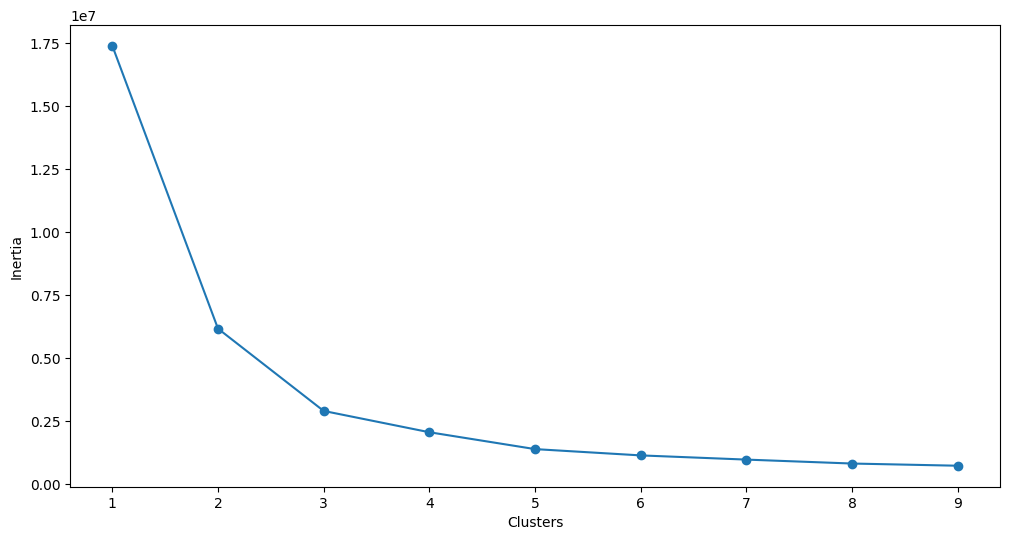

In [3]:
# Plotting inertia
frame = pd.DataFrame({'Cluster':range(1,10), 'inertia':inertia})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['inertia'], marker='o')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

In [4]:
# Building the model with optimal cluster number
kmeans = KMeans(n_clusters=3, n_init='auto')
kmeans.fit(kmeans_data)

KMeans(n_clusters=3, n_init='auto')

In [5]:
# Adding cluster classes
df.insert(15, "Cluster", kmeans.labels_, True)
df.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Stream,Cluster
0,0.818,0.705,6.0,0.007277,0.1770,0.008360,0.002330,0.6130,0.772,138.559,0.007177,0.008922,0.009572,0.010508,0.008379,0
1,0.676,0.703,8.0,0.007436,0.0302,0.086900,0.000687,0.0463,0.852,92.761,0.007115,0.007930,0.008500,0.009023,0.007891,1
2,0.695,0.923,1.0,0.007783,0.0522,0.042500,0.046900,0.1160,0.551,108.014,0.007157,0.006990,0.007679,0.007773,0.007248,1
3,0.689,0.739,2.0,0.007437,0.0260,0.000015,0.509000,0.0640,0.578,120.423,0.007205,0.008402,0.008809,0.009527,0.008027,0
4,0.663,0.694,10.0,0.006919,0.1710,0.025300,0.000000,0.0698,0.525,167.953,0.007425,0.008872,0.009569,0.010433,0.008169,2


#KNN

In [6]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['Cluster']), df['Cluster'], test_size=0.10)

In [7]:
# Building the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

yhat = knn.predict(X_test)

In [8]:
# Evaluation
print(confusion_matrix(y_test, yhat))
print(accuracy_score(y_test, yhat))

[[852   0   0]
 [  3 730   0]
 [  1   0 369]]
0.9979539641943734


In [9]:
yhatt = knn.predict(X_train)
print(confusion_matrix(y_train, yhatt))
print(accuracy_score(y_train, yhatt))

[[7500    1    2]
 [   3 6937    0]
 [   1    0 3150]]
0.9996021370921905
